<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Lab%203/Airline_Passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding 1	

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).

- The Dataset we picked contains data from  USA airline passenger satisfaction surveys. The data was collected in an effort for airlines to better understand their passengers. 

How will you measure the effectiveness of a good algorithm? 
- Using various questions about their travel, a Clustering Analysis that clusters passengers into satisfied and not satisfied can be built. We will measure the effectiveness of the model by evaluating Accuarcy, Precision, and Recall on the Test data.

Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?
- Analyzing the variables that determine clusters will provide insight into which factors are most important for airline passenger's satisfaction. This can be leveraged by airline operations, to focus efforts on the areas that are most important for customer satisfaction.



# Data Understanding 1	

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import statistics
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# read the files into a dataframe
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')


# verify the dataframe loaded
print(train.shape)
print(train.head())

print('\n')
print(test.shape)
print(test.head())


(103904, 25)
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2   

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: 




In [ ]:
combo.isnull().sum()

| Field                             | Description                                                  | Dtype    |
| --------------------------------- | ------------------------------------------------------------ | -------- |
| Gender                            | Gender of the passengers (Female, Male)                      | object   |
| Customer Type                     | The customer type (Loyal customer, disloyal customer)        | object   |
| Age                               | The actual age of the passengers                             | int64    |
| Type of Travel                    | Purpose of the flight of the passengers (Personal Travel, Business Travel) | object   |
| Class                             | Travel class in the plane of the passengers (Business, Eco, Eco Plus) | object   |
| Flight distance                   | The flight distance of this journey                          | int64    |
| Inflight wifi service             | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) | int64    |
| Departure/Arrival time convenient | Satisfaction level of Departure/Arrival time convenient     | int64    |
| Ease of Online booking            | Satisfaction level of online booking                        | int64    |
| Gate location                     | Satisfaction level of Gate location                          | int64    |
| Food and drink                    | Satisfaction level of Food and drink                         | int64    |
| Online boarding                   | Satisfaction level of online boarding                        | int64    |
| Seat comfort                      | Satisfaction level of Seat comfort                           | int64    |
| Inflight entertainment            | Satisfaction level of inflight entertainment                 | int64    |
| On-board service                  | Satisfaction level of On-board service                       | int64    |
| Leg room service                  | Satisfaction level of Leg room service                       | int64    |
| Baggage handling                  | Satisfaction level of baggage handling                       | int64    |
| Check-in service                  | Satisfaction level of Check-in service                       | int64    |
| Inflight service                  | Satisfaction level of inflight service                       | int64    |
| Cleanliness                       | Satisfaction level of Cleanliness                            | int64    |
| Departure Delay in Minutes        | Minutes delayed when departure                               | int64    |
| Arrival Delay in Minutes          | Minutes delayed when Arrival                                 | float64  |
| Satisfaction                      | Airline satisfaction level(Satisfaction, neutral or dissatisfaction) | object   |


All of the satisfaction level fields are ranked between 0-5. 

In [ ]:
# Delete unnecessary row
train.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

# check
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
frames = [train,test]

result = pd.concat(frames)

In [ ]:
print(result.info())

result.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Are there missing values?  Duplicate data? Outliers? 

Are those mistakes? 

How do you deal with these problems?

In [ ]:
result.isnull().sum()


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [ ]:
print('Mean: ', result['Arrival Delay in Minutes'].mean())
print('Median: ', result['Arrival Delay in Minutes'].median())
print('Mode: ', statistics.mode(result['Arrival Delay in Minutes']))

Mean:  15.09112883918849
Median:  0.0
Mode:  0.0


There are 310 missing values in the Arrival Delay in Minutes column. We can either impute the mean or make them 0 or delete these observations. Seeing as how the Mode and the Median are both 0, we will impute them as 0.

In [ ]:
# make missing values 0
result = result.fillna(0)
# check missing values again
result.isnull().sum()


Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Data Understanding 2	

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.


In [ ]:
num_columns = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
               'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
               'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
               'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']



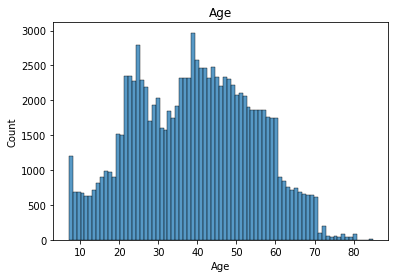

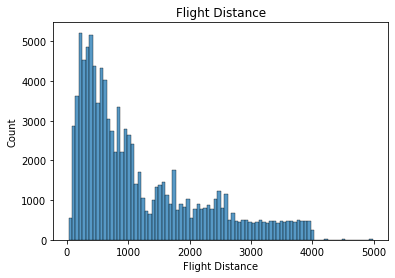

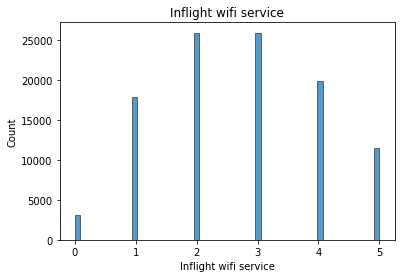

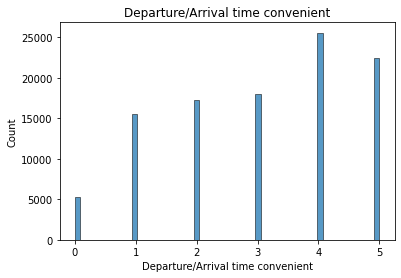

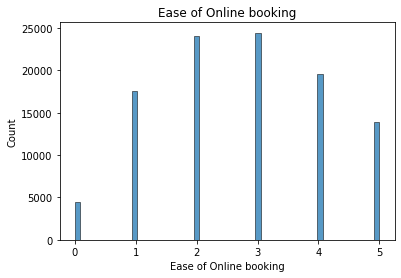

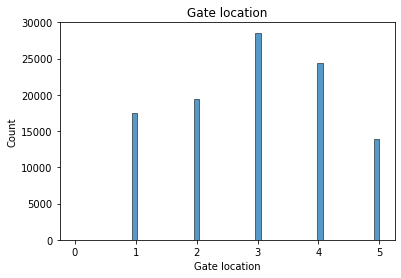

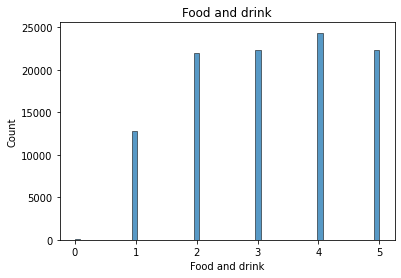

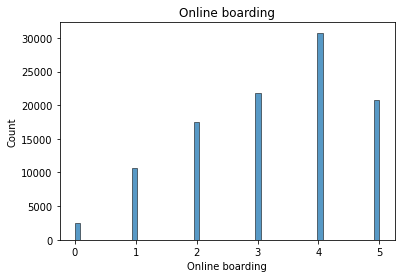

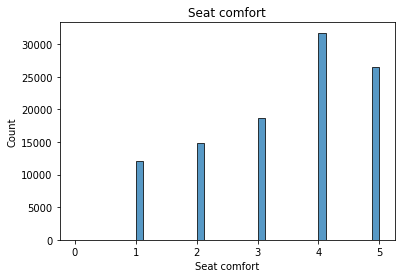

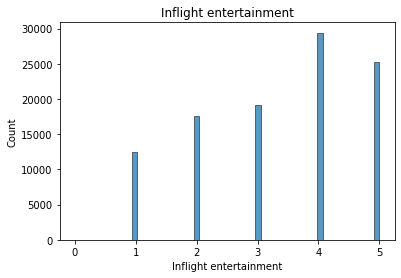

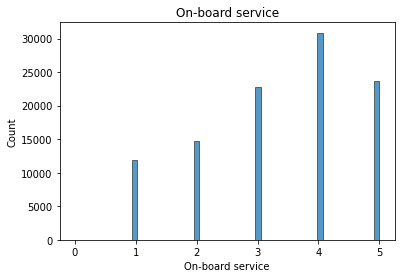

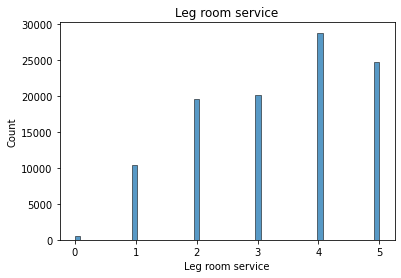

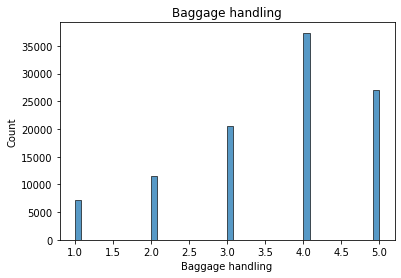

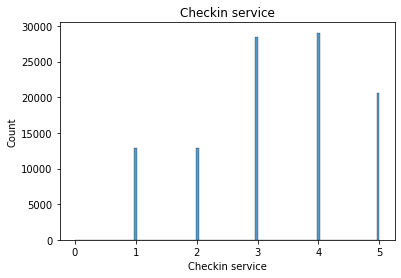

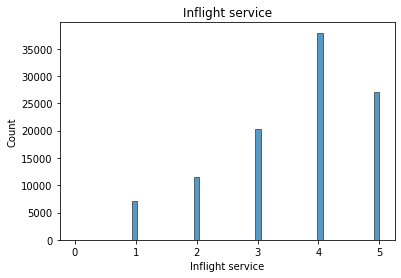

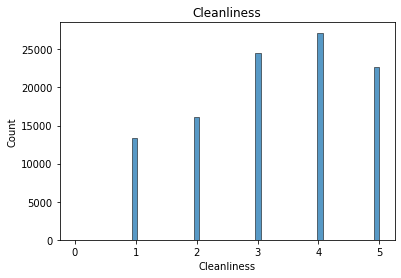

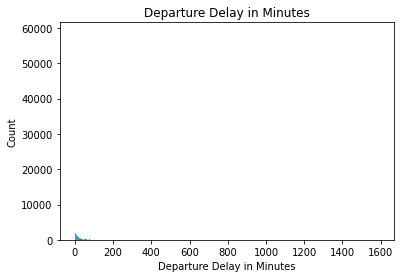

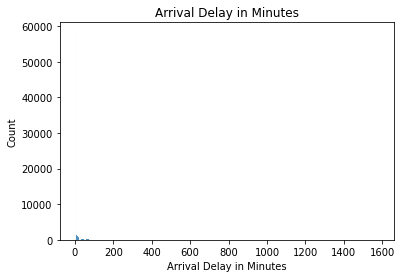

In [ ]:
for col in num_columns:
    sns.histplot(train[col])
    plt.title(col)
    plt.show();

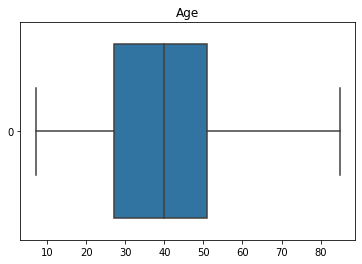

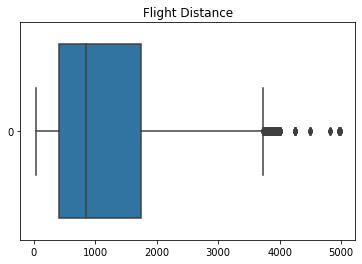

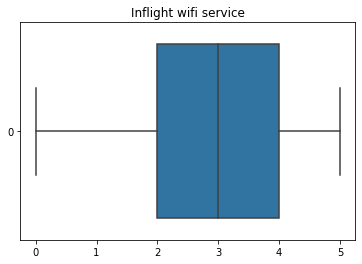

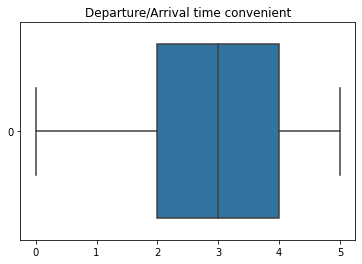

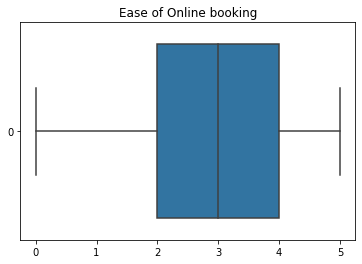

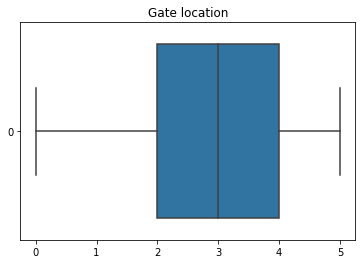

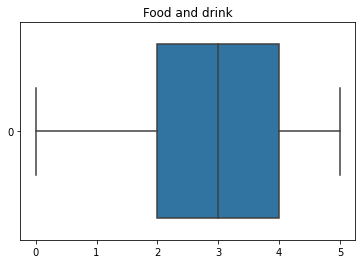

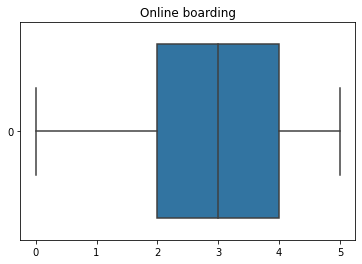

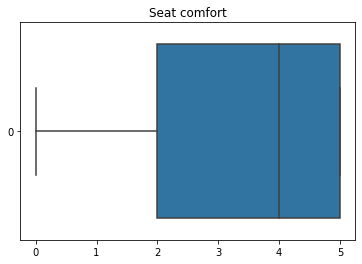

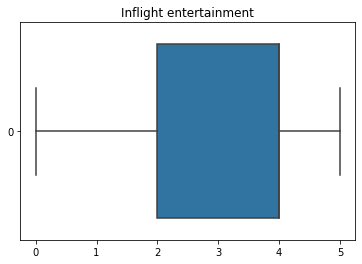

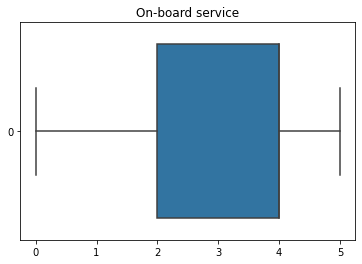

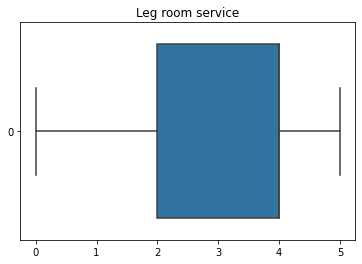

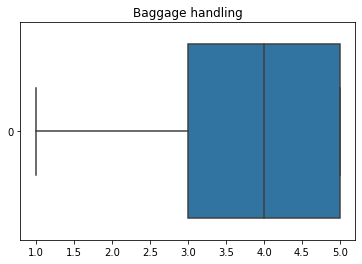

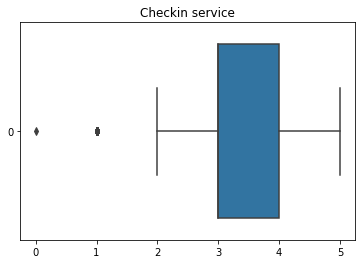

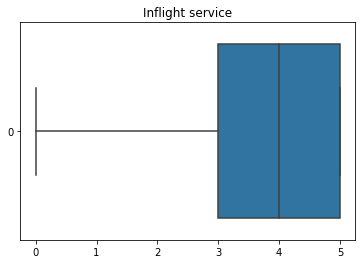

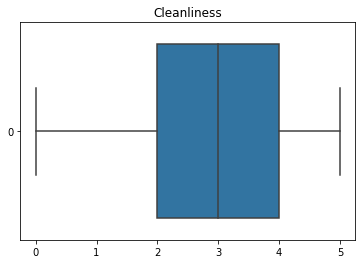

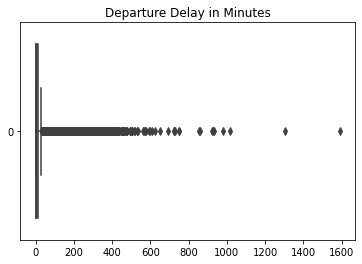

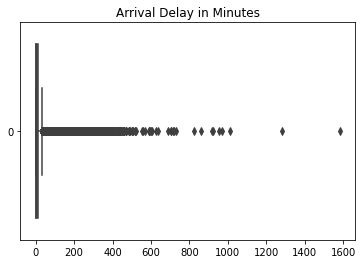

In [ ]:
for col in num_columns:
    sns.boxplot(train[col], orient = 'horizontal')
    plt.title(col)
    plt.show();

In [ ]:
# Utilized https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146

# SMU Colors
my_colors = ['#0033A0', '#C8102E']
sns.set_palette(sns.color_palette(my_colors))


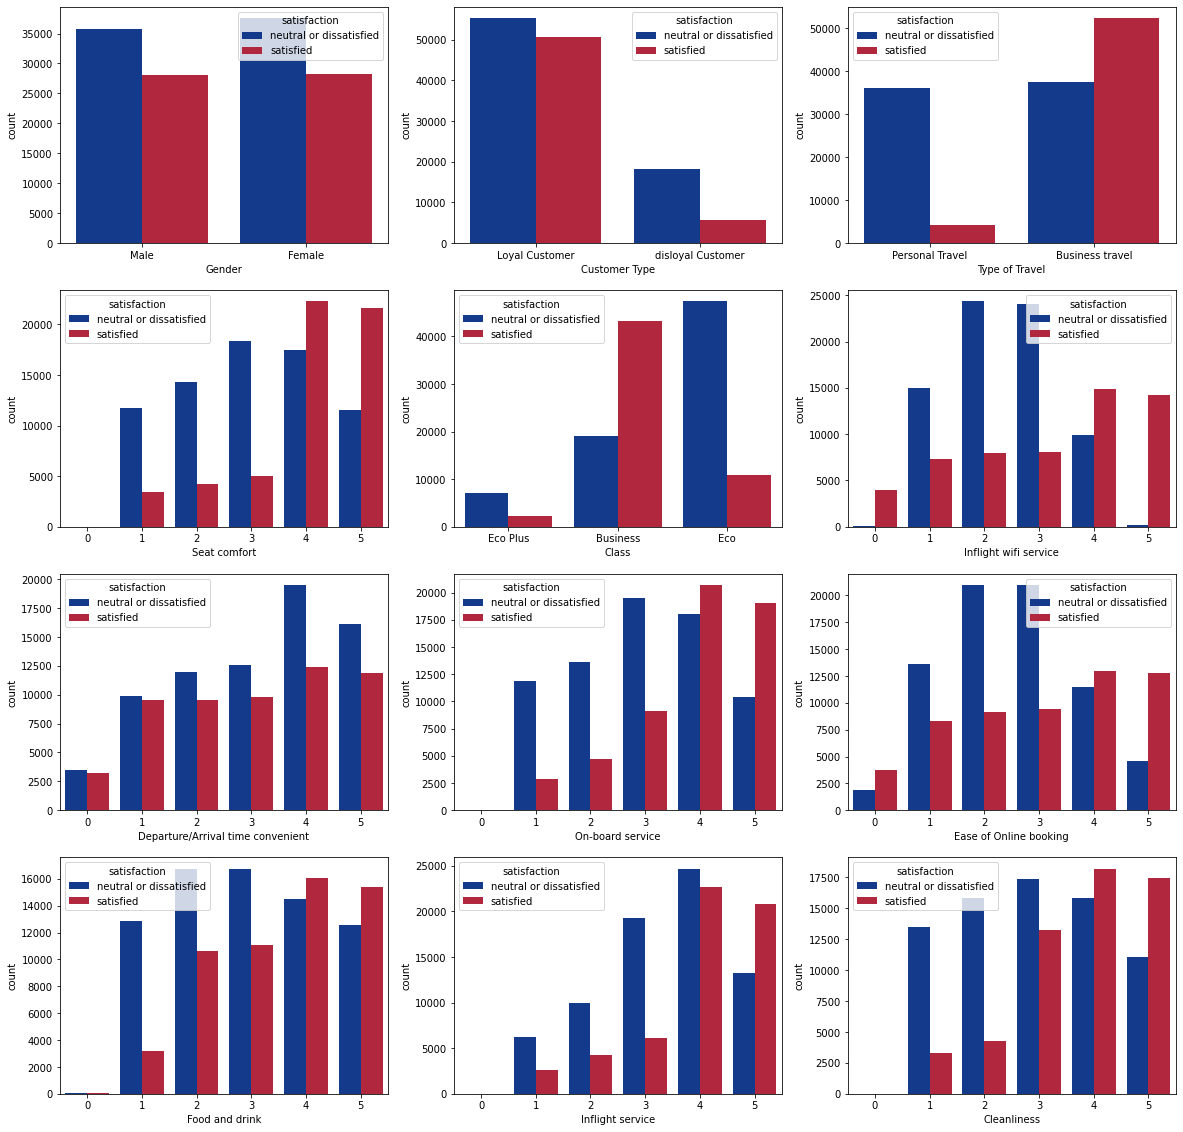

In [ ]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))

sns.countplot(x = 'Gender', data = result, hue = 'satisfaction', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = result, hue = 'satisfaction', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = result, hue = 'satisfaction', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = result, hue = 'satisfaction', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = result, hue = 'satisfaction', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = result, hue = 'satisfaction', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = result, hue = 'satisfaction', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = result, hue = 'satisfaction', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = result, hue = 'satisfaction', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = result, hue = 'satisfaction', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = result, hue = 'satisfaction', ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = result, hue = 'satisfaction', ax = axes[3, 2]);


## Variables with an impact on Satisfaction. 
Looking at where there is a large drop off from satisfied vs. neutral/dissatisfied.

### Customers
- Loyal Customers have a large skew of higher satisfaction.
- Business class flyers also have higher satifaction vs. personal travelers.

### Flight amenities
- As you may expect, business class has higher satisfaction.
- Cleanliness rating looks to be important for overall satisfaction.
- Also seeing larger deltas in satisfied vs. not in Food and Drink, inflight service, and ease of online booking. 

Found it surprising that there isn't a large drop off for departure/arrival times being convenient. Potentially passengers have some awareness of uncontrollable factors impacting flight times, and do not consider it part of how they rate an airline overall.


# Modeling and Evaluation 1	

In [ ]:
# if we want dummy variables
result_dummies = pd.get_dummies(result)
result_dummies

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,1,1,0,0,1,0,0,1,1,0
1,25,235,3,2,3,3,1,3,1,1,...,1,0,1,1,0,1,0,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,1,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,0,1,0
4,61,214,3,3,3,3,4,5,5,3,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,1,0,1,1,0,1,0,0,1,0
25972,23,646,4,4,4,4,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1
25973,17,828,2,5,1,5,2,1,2,2,...,0,1,0,0,1,0,1,0,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1


In [ ]:
X_all = result_dummies.drop('satisfaction_satisfied', 
                            axis = 1)

X_all = X_all.drop('satisfaction_neutral or dissatisfied', 
                   axis = 1)

y_all = result['satisfaction']

In [ ]:
X, X_test, y, y_test = train_test_split(X_all, 
                                        y_all, 
                                        test_size = 0.2, 
                                        random_state = 42)
X.shape, X_test.shape

((103904, 27), (25976, 27))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

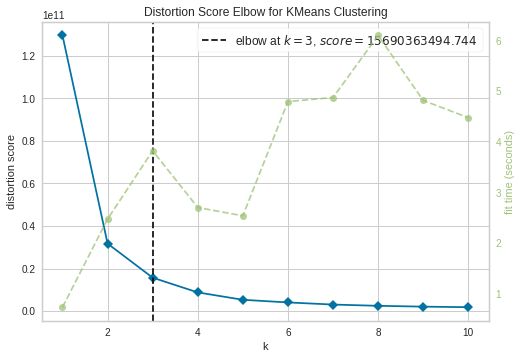

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


# Visualizing the elbow choosing the best number of clusters
visualizer=KElbowVisualizer(KMeans(), k=(1, 11))
visualizer.fit(X_all)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, 
                random_state = 42, 
                n_init = "auto").fit(X_all)

In [ ]:
# number of clusters
len(set(kmeans.labels_))

2

In [ ]:
result_cluster = result_dummies.copy()

result_cluster['Cluster KMean'] = kmeans.labels_
result_cluster

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Cluster KMean
0,13,460,3,4,3,1,5,3,5,5,...,1,0,0,1,0,0,1,1,0,0
1,25,235,3,2,3,3,1,3,1,1,...,0,1,1,0,1,0,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,0,1,0,1,0,0,0,1,0
3,25,562,2,5,5,5,2,2,2,2,...,1,0,1,0,1,0,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,0,1,1,0,1,0,0,1,0,0
25972,23,646,4,4,4,4,4,4,4,4,...,1,0,1,0,1,0,0,0,1,0
25973,17,828,2,5,1,5,2,1,2,2,...,1,0,0,1,0,1,0,1,0,0
25974,14,1127,3,3,3,3,4,4,4,4,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
result_cluster.groupby('Cluster KMean').mean()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
Cluster KMean,,,,,,,,,,,,,,,,,,,,,
0,38.371387,664.710192,2.726162,3.086829,2.709634,2.970278,3.160864,3.088007,3.318110,3.253069,...,0.491662,0.761512,0.238488,0.617818,0.382182,0.340351,0.568665,0.090985,0.653600,0.346400
1,42.311188,2624.623295,2.735609,2.977836,2.885791,2.995062,3.324596,3.701875,3.777698,3.644627,...,0.495220,0.968074,0.031926,0.889150,0.110850,0.855847,0.122247,0.021906,0.325228,0.674772


Even though we asked for three clusters it only provided two... 

We an see cluster 0 is more dissatisfied group and cluster 1 is more satisfied group.

# IDK WHAT I WAS DOING BELOW LOL WE CAN INCLUDE IF WE WANT BUT ITS MORE PREDICTION NOT CLUSTERING... IT IS DECISION TREE

Gini Decision Tree

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model_gini = DecisionTreeClassifier(
    criterion = 'gini',
    splitter = 'best',
    random_state = 42,
    max_depth = 10
)

model_gini.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_predictions_gini = model_gini.predict(X_test)
print(y_predictions_gini)

['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied' ...
 'satisfied' 'satisfied' 'neutral or dissatisfied']


In [ ]:
results_gini = pd.DataFrame()
results_gini['Actual'] = y_test
results_gini['Prediction'] = y_predictions_gini
results_gini['Correct'] = results_gini['Actual'] == results_gini['Prediction']
results_gini = results_gini.reset_index().drop('index', axis = 1)
results_gini

,Actual,Prediction,Correct
0,neutral or dissatisfied,neutral or dissatisfied,True
1,satisfied,satisfied,True
2,neutral or dissatisfied,neutral or dissatisfied,True
3,neutral or dissatisfied,neutral or dissatisfied,True
4,satisfied,satisfied,True
...,...,...,...
25971,neutral or dissatisfied,neutral or dissatisfied,True
25972,satisfied,satisfied,True
25973,satisfied,satisfied,True
25974,satisfied,satisfied,True


In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_predictions_gini), 
      '\n \n', 
      'Classification Report: \n')

print(classification_report(y_test, 
                            y_predictions_gini, 
                            digits = 5))


Accuracy:  0.9459886048660302 
 
 Classification Report: 

                         precision    recall  f1-score   support

neutral or dissatisfied    0.93722   0.96895   0.95282     14622
              satisfied    0.95819   0.91642   0.93684     11354

               accuracy                        0.94599     25976
              macro avg    0.94771   0.94268   0.94483     25976
           weighted avg    0.94639   0.94599   0.94584     25976



Entropy Decision Tree

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model_gini = DecisionTreeClassifier(
    criterion = 'entropy',
    splitter = 'best',
    random_state = 42,
    max_depth = 10
)

model_gini.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [ ]:
y_predictions_gini = model_gini.predict(X_test)
print(y_predictions_gini)

['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied' ...
 'satisfied' 'satisfied' 'neutral or dissatisfied']


In [ ]:
results_gini = pd.DataFrame()
results_gini['Actual'] = y_test
results_gini['Prediction'] = y_predictions_gini
results_gini['Correct'] = results_gini['Actual'] == results_gini['Prediction']
results_gini = results_gini.reset_index().drop('index', axis = 1)
results_gini

,Actual,Prediction,Correct
0,neutral or dissatisfied,neutral or dissatisfied,True
1,satisfied,satisfied,True
2,neutral or dissatisfied,neutral or dissatisfied,True
3,neutral or dissatisfied,neutral or dissatisfied,True
4,satisfied,satisfied,True
...,...,...,...
25971,neutral or dissatisfied,neutral or dissatisfied,True
25972,satisfied,satisfied,True
25973,satisfied,satisfied,True
25974,satisfied,satisfied,True


In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_predictions_gini), 
      '\n \n', 
      'Classification Report: \n')

print(classification_report(y_test, 
                            y_predictions_gini, 
                            digits = 5))


Accuracy:  0.9448336926393595 
 
 Classification Report: 

                         precision    recall  f1-score   support

neutral or dissatisfied    0.94084   0.96252   0.95156     14622
              satisfied    0.95026   0.92205   0.93594     11354

               accuracy                        0.94483     25976
              macro avg    0.94555   0.94229   0.94375     25976
           weighted avg    0.94496   0.94483   0.94473     25976



Kmeans Clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

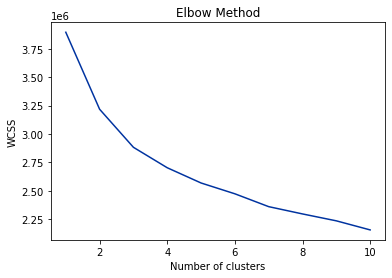

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
Cluster,,,,,,,,,,,,,,,,,,,,,
0,43.184541,1670.116068,3.207583,2.989276,3.053867,3.000409,3.670650,4.182212,4.172488,4.208563,...,0.502410,0.950566,0.049434,0.988622,0.011378,0.851657,0.113310,0.035033,0.022776,0.977224
1,42.186883,1316.368997,2.252518,2.892619,2.885710,2.993724,2.650805,2.696979,2.751910,2.325111,...,0.493261,0.999854,0.000146,0.977278,0.022722,0.543814,0.336253,0.119934,0.913346,0.086654
2,38.265901,787.690273,2.491583,3.655196,2.448089,2.921455,3.061377,2.775546,3.179809,3.058973,...,0.500537,0.998183,0.001817,0.001279,0.998721,0.054751,0.834442,0.110807,0.911426,0.088574
3,30.258796,704.488044,2.522525,2.276742,2.516465,3.008550,2.931554,2.527364,2.905905,2.948748,...,0.454926,0.000047,0.999953,0.994034,0.005966,0.335933,0.621788,0.042279,0.842815,0.157185


In [ ]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(result_dummies)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters based on the elbow plot and perform K-Means clustering
kmeans = KMeans(n_clusters = 4, 
                init = 'k-means++', 
                random_state = 42)

kmeans.fit(df_norm)

# Add the cluster labels to the original DataFrame
result_dummies['Cluster'] = kmeans.labels_

# Analyze the results by examining the mean values of each feature for each cluster
result_dummies.groupby('Cluster').mean()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# get regular result_dummy df back
result_dummies = pd.get_dummies(result)
result_dummies

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(result_dummies)

# Determine the optimal number of clusters using the dendrogram
linked = linkage(df_norm, 'ward')
dendrogram(linked, orientation='top')
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Choose the number of clusters based on the dendrogram and perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc.fit(df_norm)

# Add the cluster labels to the original DataFrame
result_dummies['Cluster'] = hc.labels_

# Analyze the results by examining the mean values of each feature for each cluster
result_dummies.groupby('Cluster').mean()


In [ ]:
# Causes colab to crash due to RAM

# from sklearn.cluster import SpectralClustering
# import numpy as np

# clustering = SpectralClustering(n_clusters=2,
#         assign_labels='discretize',
#         random_state=0).fit(X_all)
# clustering.labels_
# clustering
# SpectralClustering(assign_labels='discretize', n_clusters=2,
#     random_state=0)